# Salary Prediction

## Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/Salary Prediction.csv')
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data Preprocessing

In [7]:
# Handling NUll Values:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
# Handling Duplicate Values
df.duplicated().sum()

np.int64(52)

In [9]:
# Add small noise to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols] + np.random.normal(0, 1e-6, size=df[numeric_cols].shape)

In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# Duplicacy has beeen removed here 

Number of duplicate rows: 0


In [11]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [12]:
# displaying unique values of categorical columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")
# Display first few rows of the cleaned dataframe
df.head()


Unique values in 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in 'occupation': ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Unique values in 'relationship': ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Unique values in 'race': ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Unique values in 'gender'

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,24.999998,Private,226802.000000,11th,7.000001,Never-married,Machine-op-inspct,Own-child,Black,Male,-1.302324e-07,-8.966276e-08,40.000000,United-States,<=50K
1,38.000001,Private,89813.999999,HS-grad,9.000000,Married-civ-spouse,Farming-fishing,Husband,White,Male,3.899900e-07,1.485102e-06,49.999999,United-States,<=50K
2,28.000000,Local-gov,336951.000000,Assoc-acdm,12.000000,Married-civ-spouse,Protective-serv,Husband,White,Male,1.007516e-08,4.930623e-07,40.000000,United-States,>50K
3,43.999999,Private,160322.999999,Some-college,10.000000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7.688000e+03,7.061600e-07,40.000000,United-States,>50K
4,18.000000,?,103497.000001,Some-college,10.000000,Never-married,?,Own-child,White,Female,7.197018e-07,5.721034e-07,30.000002,United-States,<=50K


In [13]:
edu_mapping = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Doctorate': 14
}

df['education'] = df['education'].map(edu_mapping)

one_hot_cols = [
    'workclass', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



In [14]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['income']


In [15]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [16]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: []


In [17]:
df.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,24.999998,226802.000000,6.0,7.000001,-1.302324e-07,-8.966276e-08,40.000000,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38.000001,89813.999999,8.0,9.000000,3.899900e-07,1.485102e-06,49.999999,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28.000000,336951.000000,11.0,12.000000,1.007516e-08,4.930623e-07,40.000000,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,43.999999,160322.999999,9.0,10.000000,7.688000e+03,7.061600e-07,40.000000,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18.000000,103497.000001,9.0,10.000000,7.197018e-07,5.721034e-07,30.000002,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('income')  # target column

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

print("Columns after processing:", df.columns.tolist())
display(df.head())

Columns after processing: ['age', 'fnlwgt', 'education', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Not-in-family', 'relationship_Other-relative', 'rela

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.200762,-1.197259,-0.144804,-0.217127,-0.034087,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.046941,-0.945524,-0.394939,-0.419335,-0.144804,-0.217127,0.772930,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.776316,1.394723,0.813796,0.747550,-0.144804,-0.217127,-0.034087,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.390683,-0.277844,0.007973,-0.030373,0.886874,-0.217127,-0.034087,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.505691,-0.815954,0.007973,-0.030374,-0.144804,-0.217127,-0.841104,0,False,False,...,False,False,False,False,False,False,False,True,False,False


## Training Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Drop columns that are entirely NaN (e.g., 'education')
X = X.dropna(axis=1, how='all')

# Impute remaining numeric NaNs with median and fill any other NaNs with 0
numeric_cols = X.select_dtypes(include=[np.number]).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
X = X.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluation

Evaluation metrics on test set:
MAE     0.262528
MSE     0.113902
RMSE    0.337493
R2      0.365326


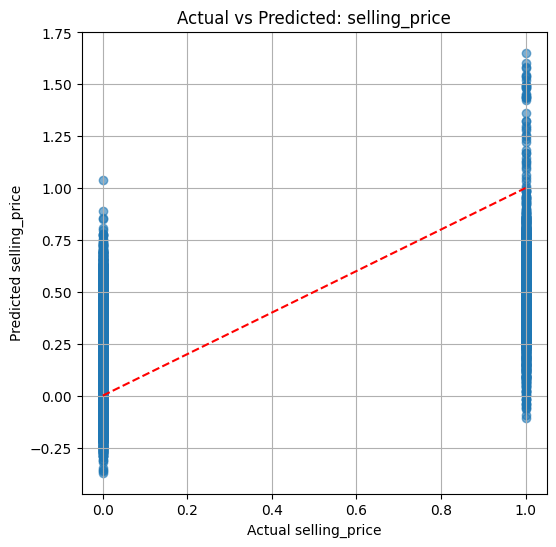

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
import pandas as pd
metrics = pd.Series({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
})
print("Evaluation metrics on test set:")
print(metrics.to_string())

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual selling_price')
plt.ylabel('Predicted selling_price')
plt.title('Actual vs Predicted: selling_price')
plt.grid(True)
plt.show()

Thanks!

### Using XGBoost CLassifier because this problem seems to be considered in the CLassification Problelm


In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [22]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


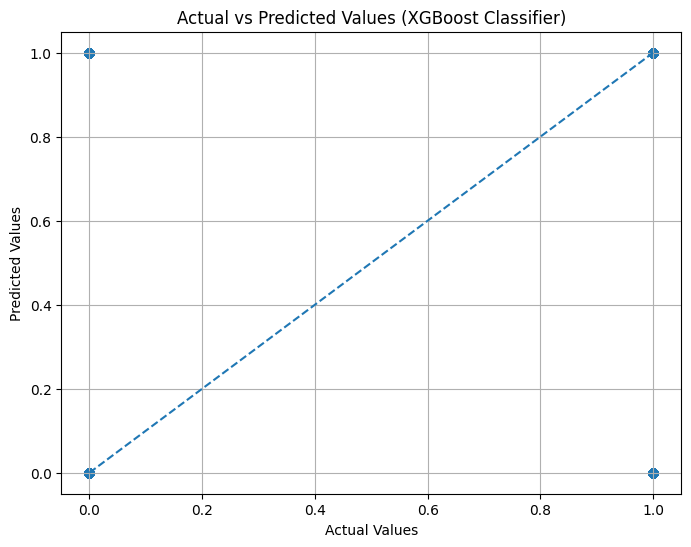

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Classifier)")
plt.grid(True)
plt.show()


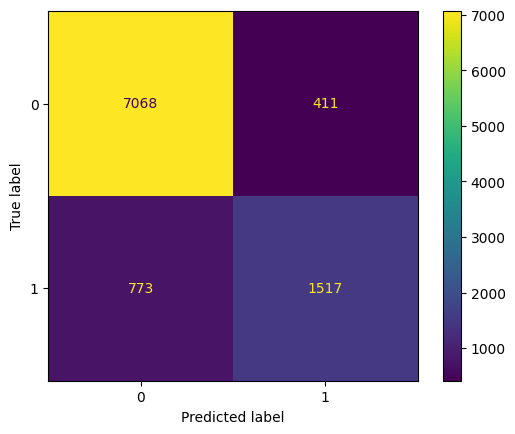

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Interpretation:

# Diagonal → correct predictions

# Off-diagonal → errors


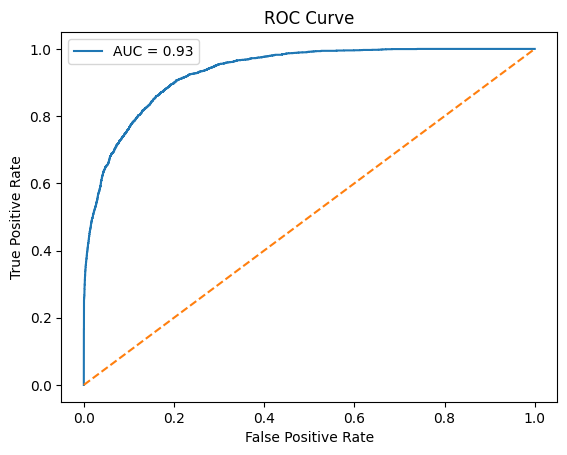

In [25]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7479
           1       0.79      0.66      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.88      9769

